# Binary Classification of Insurance Cross Selling

## Work with original datasets to process feature engineering

### EDA

In [3]:
import pandas as pd
data_dir = '/kaggle/input/health-insurance-cross-sell-prediction/'
raw_df = pd.read_csv(data_dir + 'train.csv')
test_df = pd.read_csv(data_dir + 'test.csv')

In [4]:
raw_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
raw_df['Response'].value_counts(normalize=True)

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

In [7]:
def view_feature(feature: str, is_numeric: bool=False):
    d = dict()    
    df = raw_df[[feature, 'Response']].copy()
    if is_numeric:
        des = df[feature].describe()
        value_min = des.get('min') - 0.000001
        value_25 = des.get('25%')
        value_50 = des.get('50%')
        value_75 = des.get('75%')
        value_max = des.get('max') + 0.000001
        df[feature] = pd.cut(df[feature], 
                             bins=[value_min, value_25, value_50, value_75, value_max],
                             labels=['Low','Medium1','Medium2','High'])
    total = df[feature].value_counts()
    idx = df['Response'].value_counts().index.tolist()
    for t in idx:
        x = df[df['Response']==t][feature].value_counts()
        d[t] = x/total*100
    
    return pd.DataFrame(data=d, columns=idx)

In [8]:
raw_df['Gender'].value_counts(dropna=False)

Gender
Male      206089
Female    175020
Name: count, dtype: int64

In [9]:
view_feature('Gender')

,0,1
Gender,,
Male,86.158893,13.841107
Female,89.609759,10.390241


count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

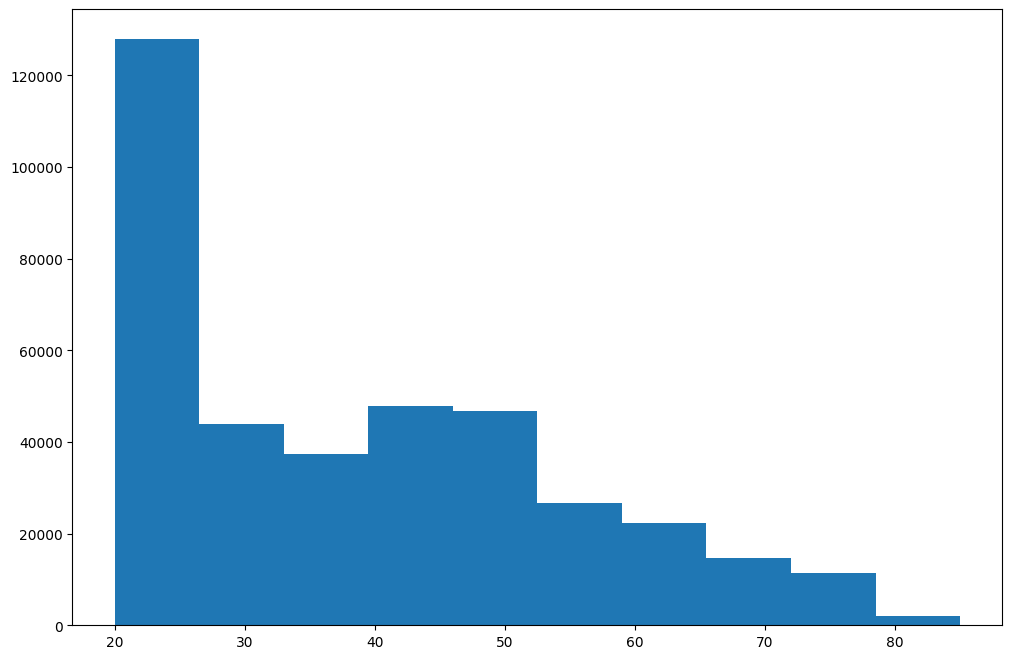

In [10]:
plt.figure(figsize=(12,8))
plt.hist(raw_df['Age'], bins=10);
raw_df['Age'].describe()

In [11]:
view_feature('Age', is_numeric=True)

,0,1
Age,,
Low,96.465657,3.534343
Medium1,87.915681,12.084319
Medium2,78.657968,21.342032
High,86.118114,13.881886


In [12]:
raw_df['Driving_License'].value_counts(dropna=False)

Driving_License
1    380297
0       812
Name: count, dtype: int64

In [13]:
view_feature('Driving_License')

,0,1
Driving_License,,
1,87.728276,12.271724
0,94.950739,5.049261


In [14]:
raw_df['Region_Code'].value_counts()

Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
23.0      1960
31.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: count, dtype: int64

In [15]:
view_feature('Region_Code')

,0,1
Region_Code,,
0.0,91.390401,8.609599
1.0,89.186508,10.813492
2.0,92.892521,7.107479
3.0,87.233813,12.766187
4.0,84.175458,15.824542
5.0,88.428460,11.571540
6.0,93.009554,6.990446
7.0,86.825252,13.174748
8.0,90.385807,9.614193


In [16]:
raw_df['Previously_Insured'].value_counts()

Previously_Insured
0    206481
1    174628
Name: count, dtype: int64

In [17]:
view_feature('Previously_Insured')

,0,1
Previously_Insured,,
0,77.454584,22.545416
1,99.909522,0.090478


In [18]:
raw_df['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [19]:
view_feature('Vehicle_Age')

,0,1
Vehicle_Age,,
1-2 Year,82.624453,17.375547
< 1 Year,95.629483,4.370517
> 2 Years,70.625351,29.374649


In [20]:
raw_df['Vehicle_Damage'].value_counts()

Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64

In [21]:
view_feature('Vehicle_Damage')

,0,1
Vehicle_Damage,,
No,99.479586,0.520414
Yes,76.234454,23.765546


count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

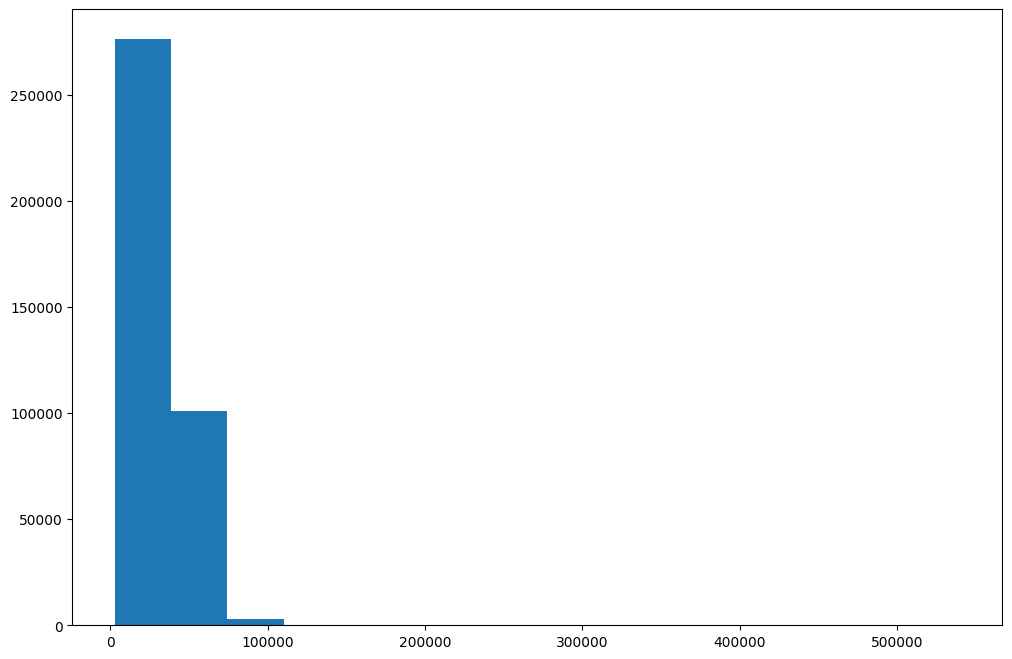

In [22]:
plt.figure(figsize=(12,8))
plt.hist(raw_df['Annual_Premium'], bins=15);
raw_df['Annual_Premium'].describe()

In [23]:
view_feature('Annual_Premium', is_numeric=True)

,0,1
Annual_Premium,,
Low,88.181522,11.818478
Medium1,89.563000,10.437000
Medium2,87.796941,12.203059
High,85.433001,14.566999


In [24]:
raw_df['Policy_Sales_Channel'].value_counts()

Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
84.0          1
123.0         1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64

In [25]:
df = view_feature('Policy_Sales_Channel')
df[df[0]>=90]

,0,1
Policy_Sales_Channel,,
1.0,96.741155,3.258845
6.0,100.000000,NaN
8.0,91.749175,8.250825
11.0,91.022444,8.977556
15.0,91.216216,8.783784
...,...,...
151.0,96.859717,3.140283
152.0,97.137642,2.862358
153.0,94.069193,5.930807


count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

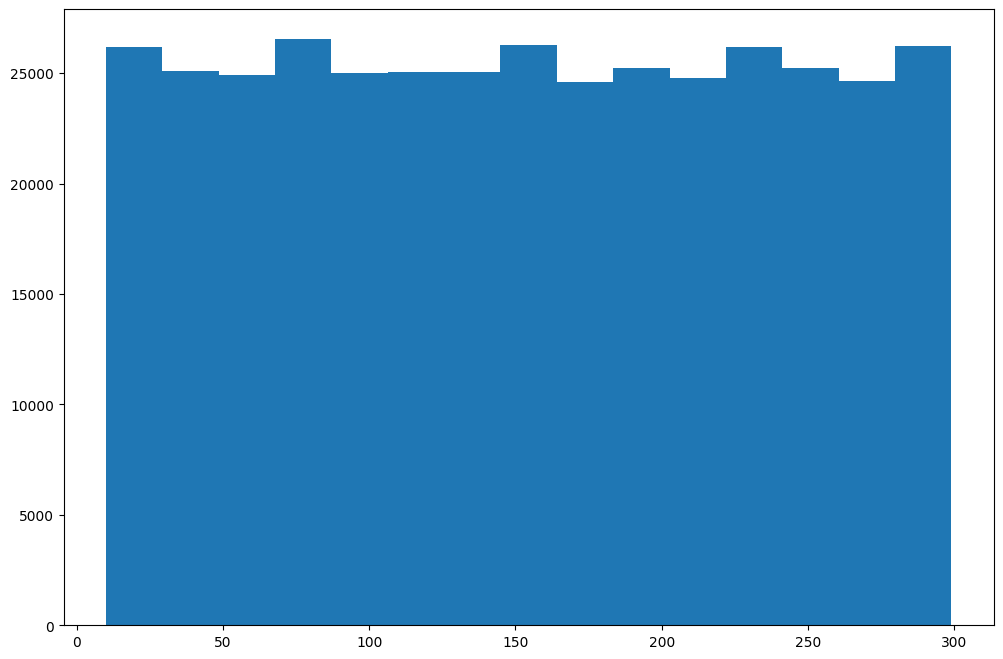

In [26]:
plt.figure(figsize=(12,8))
plt.hist(raw_df['Vintage'], bins=15);
raw_df['Vintage'].describe()

In [27]:
view_feature('Vintage', is_numeric=True)

,0,1
Vintage,,
Low,87.685861,12.314139
Medium2,87.683787,12.316213
Medium1,87.741861,12.258139
High,87.864992,12.135008


### Feature engineering

In [28]:
raw_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [29]:
original_features = raw_df.columns.tolist()[1:-1]
original_features

['Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage']

In [30]:
new_features = []

In [31]:
def get_age_group(x):
    if x<=25:
        return 3
    if x<=36:
        return 2
    if x<=49:
        return 1
    return 0

def split_age(df: pd.DataFrame):
    df['Age_Group'] = df['Age'].apply(lambda x: get_age_group(x))

In [32]:
for df in [raw_df, test_df]:
    split_age(df)
new_features.append('Age_Group')

In [33]:
view_feature('Age_Group')

,0,1
Age_Group,,
0,86.118114,13.881886
1,78.657968,21.342032
2,87.915681,12.084319
3,96.465657,3.534343


In [34]:
def switch_to_num(df: pd.DataFrame):
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}).astype('int8')
    df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2}).astype('int8')
    df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1,'No':0}).astype('int8')
    df['Age'] = df['Age'].astype('int8')
    df['Driving_License'] = df['Driving_License'].astype('int8')
    df['Region_Code'] = df['Region_Code'].astype('int8')
    df['Previously_Insured'] = df['Previously_Insured'].astype('int8')
    df['Annual_Premium'] = df['Annual_Premium'].astype('int32')
    df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype('int16')
    df['Vintage'] = df['Vintage'].astype('int16')
    if 'Response' in df.columns.tolist():
        df['Response'] = df['Response'].astype('int8')

In [35]:
for df in [raw_df, test_df]:
    switch_to_num(df)

In [36]:
def get_sum_of_cols(df: pd.DataFrame, cols: list[str]):
    name = 'sum'
    for col in cols:
        name += '_' + col
    df[name] = df[cols].sum(axis=1)

In [37]:
for df in [raw_df, test_df]:
    get_sum_of_cols(df, ['Driving_License','Previously_Insured'])

In [38]:
view_feature('sum_Driving_License_Previously_Insured')

,0,1
sum_Driving_License_Previously_Insured,,
0,92.819615,7.180385
1,77.438383,22.561617
2,99.909397,0.090603


In [39]:
new_features.append('sum_Driving_License_Previously_Insured')

In [40]:
for df in [raw_df, test_df]:
    get_sum_of_cols(df, ['Vehicle_Age','Vehicle_Damage'])

In [41]:
view_feature('sum_Vehicle_Age_Vehicle_Damage')

,0,1
sum_Vehicle_Age_Vehicle_Damage,,
0,99.668925,0.331075
1,93.838071,6.161929
2,73.323456,26.676544
3,70.597799,29.402201


In [42]:
new_features.append('sum_Vehicle_Age_Vehicle_Damage')

In [43]:
for df in [raw_df, test_df]:
    get_sum_of_cols(df, ['Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage'])

In [44]:
view_feature('sum_Driving_License_Previously_Insured_Vehicle_Age_Vehicle_Damage')

,0,1
sum_Driving_License_Previously_Insured_Vehicle_Age_Vehicle_Damage,,
1,96.896703,3.103297
2,95.445133,4.554867
3,81.536642,18.463358
4,78.165778,21.834222
5,97.368421,2.631579


In [45]:
new_features.append('sum_Driving_License_Previously_Insured_Vehicle_Age_Vehicle_Damage')

In [46]:
for df in [raw_df, test_df]:
    get_sum_of_cols(df, ['Previously_Insured','Vehicle_Damage'])

In [47]:
view_feature('sum_Previously_Insured_Vehicle_Damage')

,0,1
sum_Previously_Insured_Vehicle_Damage,,
1,86.833412,13.166588
0,96.206753,3.793247
2,99.133239,0.866761


In [48]:
new_features.append('sum_Previously_Insured_Vehicle_Damage')

In [49]:
def get_num_avg_cat(df: pd.DataFrame, num_f: str, cat_f: str):
    avg = df.groupby(cat_f)[num_f].mean()
    df[f'{num_f}_per_{cat_f}'] = df[cat_f].apply(lambda x: avg.get(x))

In [50]:
for df in [raw_df, test_df]:
    get_num_avg_cat(df, 'Age', 'Region_Code')

In [51]:
view_feature('Age_per_Region_Code', is_numeric=True)

,0,1
Age_per_Region_Code,,
Low,92.112351,7.887649
Medium1,88.860178,11.139822
Medium2,84.739921,15.260079
High,89.880746,10.119254


In [52]:
new_features.append('Age_per_Region_Code')

In [53]:
for df in [raw_df, test_df]:
    get_num_avg_cat(df, 'Annual_Premium', 'Policy_Sales_Channel')

In [54]:
raw_df['Annual_Premium_per_Policy_Sales_Channel'].describe()

count    381109.000000
mean      30564.389581
std        5209.972982
min        2630.000000
25%       30889.192493
50%       30889.192493
75%       33654.241355
max       70359.500000
Name: Annual_Premium_per_Policy_Sales_Channel, dtype: float64

In [55]:
new_features.append('Annual_Premium_per_Policy_Sales_Channel')

In [56]:
for df in [raw_df, test_df]:
    get_num_avg_cat(df, 'Annual_Premium', 'Vintage')

In [57]:
view_feature('Annual_Premium_per_Vintage', is_numeric=True)

,0,1
Annual_Premium_per_Vintage,,
Low,87.715605,12.284395
Medium1,87.906128,12.093872
Medium2,87.798325,12.201675
High,87.551196,12.448804


In [58]:
new_features.append('Annual_Premium_per_Vintage')

In [59]:
for df in [raw_df, test_df]:
    get_num_avg_cat(df, 'Annual_Premium', 'Region_Code')

In [60]:
new_features.append('Annual_Premium_per_Region_Code')

In [61]:
def get_frequency_of_cat(df: pd.DataFrame, cat_f: str, reference_df: pd.DataFrame|None=None):
    if reference_df is None:
        reference_df = df
    freq = reference_df[cat_f].value_counts()
    df[f'freq_{cat_f}'] = df[cat_f].apply(lambda x: freq.get(x))

In [62]:
for df in [raw_df, test_df]:
    get_frequency_of_cat(df, 'Region_Code', reference_df=raw_df)

In [63]:
view_feature('freq_Region_Code', is_numeric=True)

,0,1
freq_Region_Code,,
Low,90.265522,9.734478
Medium1,90.716706,9.283294
Medium2,84.616161,15.383839
High,NaN,NaN


In [64]:
new_features.append('freq_Region_Code')

In [65]:
for df in [raw_df, test_df]:
    get_frequency_of_cat(df, 'Policy_Sales_Channel', raw_df)

In [66]:
view_feature('freq_Policy_Sales_Channel', is_numeric=True)

,0,1
freq_Policy_Sales_Channel,,
Low,83.819355,16.180645
Medium1,80.061481,19.938519
Medium2,97.137642,2.862358
High,NaN,NaN


In [67]:
new_features.append('freq_Policy_Sales_Channel')

In [68]:
for df in [raw_df, test_df]:
    get_frequency_of_cat(df, 'Vintage', raw_df)

In [69]:
new_features.append('freq_Vintage')

### Preprocessing

In [70]:
all_features = original_features + new_features

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(raw_df[all_features])
raw_df[all_features] = scaler.transform(raw_df[all_features])
test_df[all_features] = scaler.transform(test_df[all_features])

In [72]:
raw_df[all_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,381109.0,0.459239,0.498336,0.0,0.000000,0.000000,1.000000,1.0
Age,381109.0,0.289578,0.238640,0.0,0.076923,0.246154,0.446154,1.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.000000,1.000000,1.000000,1.0
Region_Code,381109.0,0.507477,0.254421,0.0,0.288462,0.538462,0.673077,1.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.000000,0.000000,1.000000,1.0
Vehicle_Age,381109.0,0.304808,0.283720,0.0,0.000000,0.500000,0.500000,1.0
Vehicle_Damage,381109.0,0.504877,0.499977,0.0,0.000000,1.000000,1.000000,1.0
Annual_Premium,381109.0,0.051968,0.032022,0.0,0.040509,0.054023,0.068405,1.0
Policy_Sales_Channel,381109.0,0.685397,0.334593,0.0,0.172840,0.814815,0.932099,1.0
Vintage,381109.0,0.499472,0.289520,0.0,0.249135,0.498270,0.750865,1.0


In [73]:
test_df[all_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,127037.0,0.462865,0.498621,0.000000,0.000000,0.000000,1.000000,1.000000
Age,127037.0,0.288706,0.237936,0.000000,0.076923,0.246154,0.446154,1.000000
Driving_License,127037.0,0.998134,0.043152,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,127037.0,0.508844,0.254037,0.000000,0.288462,0.538462,0.673077,1.000000
Previously_Insured,127037.0,0.460039,0.498403,0.000000,0.000000,0.000000,1.000000,1.000000
Vehicle_Age,127037.0,0.304388,0.283685,0.000000,0.000000,0.500000,0.500000,1.000000
Vehicle_Damage,127037.0,0.502491,0.499996,0.000000,0.000000,1.000000,1.000000,1.000000
Annual_Premium,127037.0,0.051894,0.031524,0.000000,0.040360,0.053972,0.068420,0.873268
Policy_Sales_Channel,127037.0,0.683954,0.335628,0.000000,0.154321,0.827160,0.932099,1.000000
Vintage,127037.0,0.499371,0.289486,0.000000,0.249135,0.498270,0.750865,1.000000


In [74]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(raw_df[all_features], 
                                                                        raw_df['Response'],
                                                                        test_size=0.2,
                                                                        random_state=42)

### Model

In [75]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, roc_auc_score

In [76]:
train_inputs.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Age_Group',
       'sum_Driving_License_Previously_Insured',
       'sum_Vehicle_Age_Vehicle_Damage',
       'sum_Driving_License_Previously_Insured_Vehicle_Age_Vehicle_Damage',
       'sum_Previously_Insured_Vehicle_Damage', 'Age_per_Region_Code',
       'Annual_Premium_per_Policy_Sales_Channel', 'Annual_Premium_per_Vintage',
       'Annual_Premium_per_Region_Code', 'freq_Region_Code',
       'freq_Policy_Sales_Channel', 'freq_Vintage'],
      dtype='object')

In [77]:
mutual_info = mutual_info_classif(train_inputs, train_targets, random_state=42)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_inputs.columns
mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] )
mutual_info.style.background_gradient("cool")

,Numerical_Feature_MI
Previously_Insured,0.122109
Vehicle_Damage,0.111416
sum_Driving_License_Previously_Insured,0.099271
sum_Vehicle_Age_Vehicle_Damage,0.088581
Driving_License,0.058843
freq_Policy_Sales_Channel,0.055056
Policy_Sales_Channel,0.052888
Annual_Premium_per_Policy_Sales_Channel,0.051215
sum_Previously_Insured_Vehicle_Damage,0.045528
sum_Driving_License_Previously_Insured_Vehicle_Age_Vehicle_Damage,0.045499


In [78]:
importance_features = mutual_info[mutual_info['Numerical_Feature_MI']>=0.004].index.tolist()
len(importance_features)

19

In [79]:
xgb_model = XGBClassifier(n_jobs=-1)
xgb_model.fit(train_inputs[importance_features], train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
val_preds = xgb_model.predict_proba(val_inputs[importance_features])[:,1]
roc_auc_score(val_targets, val_preds)

0.8600744760286587

In [81]:
lgbm_model = LGBMClassifier(n_jobs=-1)
lgbm_model.fit(train_inputs[importance_features], train_targets)

[LightGBM] [Info] Number of positive: 37187, number of negative: 267700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 304887, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121970 -> initscore=-1.973908
[LightGBM] [Info] Start training from score -1.973908


LGBMClassifier(n_jobs=-1)

In [82]:
val_preds = lgbm_model.predict_proba(val_inputs[importance_features])[:,1]
roc_auc_score(val_targets, val_preds)

0.8609045974143263

In [83]:
cat_model = CatBoostClassifier(iterations=2000)
cat_model.fit(train_inputs[importance_features], train_targets)

Learning rate set to 0.06275
0:	learn: 0.5844563	total: 95.5ms	remaining: 3m 10s
1:	learn: 0.5056453	total: 133ms	remaining: 2m 12s
2:	learn: 0.4691193	total: 168ms	remaining: 1m 51s
3:	learn: 0.4194940	total: 210ms	remaining: 1m 44s
4:	learn: 0.3913556	total: 245ms	remaining: 1m 37s
5:	learn: 0.3640527	total: 283ms	remaining: 1m 34s
6:	learn: 0.3445539	total: 319ms	remaining: 1m 30s
7:	learn: 0.3294448	total: 355ms	remaining: 1m 28s
8:	learn: 0.3179845	total: 394ms	remaining: 1m 27s
9:	learn: 0.3095900	total: 432ms	remaining: 1m 25s
10:	learn: 0.3031516	total: 474ms	remaining: 1m 25s
11:	learn: 0.2979891	total: 515ms	remaining: 1m 25s
12:	learn: 0.2935733	total: 551ms	remaining: 1m 24s
13:	learn: 0.2897654	total: 590ms	remaining: 1m 23s
14:	learn: 0.2869260	total: 629ms	remaining: 1m 23s
15:	learn: 0.2843189	total: 671ms	remaining: 1m 23s
16:	learn: 0.2824210	total: 711ms	remaining: 1m 22s
17:	learn: 0.2807617	total: 747ms	remaining: 1m 22s
18:	learn: 0.2789795	total: 790ms	remaining:

In [84]:
val_preds = cat_model.predict_proba(val_inputs[importance_features])[:,1]
roc_auc_score(val_targets, val_preds)

0.8602404910170074

In [85]:
def feature_engineering(df: pd.DataFrame, reference_df: pd.DataFrame|None=None):
    switch_to_num(df)
    
    df['Age_Group'] = df['Age'].apply(lambda x: get_age_group(x))
    
    get_sum_of_cols(df, ['Driving_License', 'Previously_Insured'])
    get_sum_of_cols(df, ['Vehicle_Age', 'Vehicle_Damage'])
    get_sum_of_cols(df, ['Previously_Insured', 'Vehicle_Damage'])
    get_sum_of_cols(df, ['Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage'])
    
    get_num_avg_cat(df, 'Age', 'Region_Code')
    get_num_avg_cat(df, 'Annual_Premium', 'Policy_Sales_Channel')
    get_num_avg_cat(df, 'Annual_Premium', 'Vintage')
    get_num_avg_cat(df, 'Annual_Premium', 'Region_Code')
    
    get_frequency_of_cat(df, 'Region_Code', reference_df=reference_df)
    get_frequency_of_cat(df, 'Policy_Sales_Channel', reference_df=reference_df)
    get_frequency_of_cat(df, 'Vintage', reference_df=reference_df)

## Work with competitions datasets

### EDA & Feature Engineering

In [87]:
%%time
data_dir = '/kaggle/input/playground-series-s4e7/'
raw_df = pd.read_csv(data_dir + 'train.csv')
test_df = pd.read_csv(data_dir + 'test.csv')
sub_df = pd.read_csv(data_dir + 'sample_submission.csv')

CPU times: user 22.8 s, sys: 3.8 s, total: 26.6 s
Wall time: 34.8 s


In [88]:
%%time
for df in [raw_df, test_df]:
    switch_to_num(df)

CPU times: user 5.32 s, sys: 254 ms, total: 5.58 s
Wall time: 5.58 s


In [89]:
original_df = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')

In [90]:
switch_to_num(original_df)

In [91]:
sample_df = raw_df.sample(1000000, random_state=42)
train_df, val_df = train_test_split(sample_df, test_size=0.25, random_state=42)

### Training model and hyperparameter tuning

In [92]:
def test_params(train_df: pd.DataFrame, val_df: pd.DataFrame,
                importance_features: list[str], add_original:bool=False,
                is_scaler: bool=False, **params):
    if add_original:
        train_df = pd.concat([original_df, train_df]).reset_index(drop=True).copy()
    if is_scaler:
        scaler = MinMaxScaler()
        scaler.fit(train_df[importance_features])
        train_df[importance_features] = scaler.transform(train_df[importance_features])
        val_df[importance_features] = scaler.transform(val_df[importance_features])
    train_df = pd.concat([original_df, train_df]).reset_index(drop=True).copy()
    train_inputs, train_targets = train_df[importance_features], train_df['Response']
    val_inputs, val_targets = val_df[importance_features], val_df['Response']
    eval_set = (val_inputs, val_targets)
    model = XGBClassifier(**params)
    model.fit(train_inputs, train_targets, 
              eval_set=[eval_set], early_stopping_rounds=50, verbose=False)
    best_iter = model.best_iteration
    train_preds = model.predict_proba(train_inputs, iteration_range=(0,best_iter))[:,1]
    val_preds = model.predict_proba(val_inputs, iteration_range=(0,best_iter))[:,1]
    train_acc = roc_auc_score(train_targets, train_preds)
    val_acc = roc_auc_score(val_targets, val_preds)
    return train_acc, val_acc

In [93]:
from sklearn.model_selection import GridSearchCV

#### XGB Regressor

In [95]:
train_df = pd.concat([original_df, train_df]).reset_index(drop=True).copy()
train_inputs, train_targets = train_df[original_features], train_df['Response']
val_inputs, val_targets = val_df[original_features], val_df['Response']

In [97]:
param_grid = {
    'n_estimators': [100,300,525],
    'max_depth': [8,15],
    'learning_rate': [0.05,0.12],
    'reg_alpha': [0.25],
    'subsample': [0.8,0.85],
    'min_split_loss': [0.0015],
    'min_child_weight': [5],
    'eval_metric': ['auc'],
    'tree_method': ['hist'],
    'colsample_bytree': [0.25,0.5],
    'max_bin': [2**15, 2**16],
    'n_jobs': [-1]
}
grid = GridSearchCV(XGBClassifier(), param_grid=param_grid, 
                    scoring='roc_auc', cv=3,
                    refit=True, verbose=3)

In [98]:
%%time
grid.fit(train_inputs, train_targets)

Fitting 3 folds for each of 96 candidates, totalling 288 fits

[CV 1/3] END colsample_bytree=0.25, eval_metric=auc, learning_rate=0.05, max_bin=32768, max_depth=8, min_child_weight=5, min_split_loss=0.0015, n_estimators=100, n_jobs=-1, reg_alpha=0.25, subsample=0.8, tree_method=hist;, score=0.851 total time=   8.6s

[CV 2/3] END colsample_bytree=0.25, eval_metric=auc, learning_rate=0.05, max_bin=32768, max_depth=8, min_child_weight=5, min_split_loss=0.0015, n_estimators=100, n_jobs=-1, reg_alpha=0.25, subsample=0.8, tree_method=hist;, score=0.865 total time=   9.4s

[CV 3/3] END colsample_bytree=0.25, eval_metric=auc, learning_rate=0.05, max_bin=32768, max_depth=8, min_child_weight=5, min_split_loss=0.0015, n_estimators=100, n_jobs=-1, reg_alpha=0.25, subsample=0.8, tree_method=hist;, score=0.865 total time=   8.7s

[CV 1/3] END colsample_bytree=0.25, eval_metric=auc, learning_rate=0.05, max_bin=32768, max_depth=8, min_child_weight=5, min_split_loss=0.0015, n_estimators=100, n_jobs=-1,

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.25, 0.5],
                         'eval_metric': ['auc'], 'learning_rate': [0.05, 0.12],
                         'max_bin': [32768, 65536], 'max_depth': [8, 15],
                         'min_child_weight': [5], 'min_split_loss': [0.0015],
                         'n_estimators': [100, 300, 525], 'n_jobs': [-1],
                         'reg_alpha': [0.25], 'subsample': [0.8, 0.85],
                         'tree_method': ['hist']},
             scoring='roc_auc', verbose=3)

In [99]:
grid.best_params_

{'colsample_bytree': 0.25,
 'eval_metric': 'auc',
 'learning_rate': 0.05,
 'max_bin': 65536,
 'max_depth': 15,
 'min_child_weight': 5,
 'min_split_loss': 0.0015,
 'n_estimators': 525,
 'n_jobs': -1,
 'reg_alpha': 0.25,
 'subsample': 0.8,
 'tree_method': 'hist'}

In [103]:
train_acc, val_acc = test_params(train_df, val_df, add_original=False, 
                                    importance_features=original_features, n_jobs=-1,
                                    n_estimators=525, learning_rate=0.05,
                                    reg_alpha=0.25, subsample=0.8,
                                    colsample_bytree=0.25, max_depth=15,
                                    min_child_weight=5, min_split_loss=0.0015,
                                    eval_metric='auc', max_bin=65536,
                                    tree_method='hist')
print(f'train_acc = {train_acc}, val_acc = {val_acc}')

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

  warnings.warn(


train_acc = 0.8957026562448397, val_acc = 0.882916265501133


In [94]:
train_df, val_df = train_test_split(raw_df, test_size=0.28, random_state=42)

In [95]:
train_df.shape, val_df.shape

((8283454, 12), (3221344, 12))

In [96]:
train_df = pd.concat([original_df, train_df]).reset_index(drop=True).copy()
train_inputs, train_targets = train_df[original_features], train_df['Response']
val_inputs, val_targets = val_df[original_features], val_df['Response']

In [97]:
best_xgb_hyperparameters = {
    'colsample_bytree': 0.25,
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_bin': 65536,
    'max_depth': 15,
    'min_child_weight': 5,
    'min_split_loss': 0.0015,
    'n_estimators': 525,
    'n_jobs': -1,
    'reg_alpha': 0.25,
    'subsample': 0.8,
    'tree_method': 'hist'
}

In [98]:
xgb_model = XGBClassifier(**best_xgb_hyperparameters, 
                          early_stopping_rounds=50,
                          device='cuda')
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, device='cuda', early_stopping_rounds=50,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=65536,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, min_split_loss=0.0015, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=525,
              n_jobs=-1, num_parallel_tree=None, ...)

In [99]:
eval_set = (val_inputs, val_targets)

In [100]:
%%time
xgb_model.fit(train_inputs, train_targets, eval_set=[eval_set], verbose=False)

CPU times: user 2min 50s, sys: 1.04 s, total: 2min 51s
Wall time: 2min 37s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, device='cuda', early_stopping_rounds=50,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=65536,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, min_split_loss=0.0015, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=525,
              n_jobs=-1, num_parallel_tree=None, ...)

In [101]:
best_iter = xgb_model.best_iteration
train_preds = xgb_model.predict_proba(train_inputs, iteration_range=(0,best_iter))[:,1]
val_preds = xgb_model.predict_proba(val_inputs, iteration_range=(0,best_iter))[:,1]
train_acc = roc_auc_score(train_targets, train_preds)
val_acc = roc_auc_score(val_targets, val_preds)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:18:30] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [102]:
train_acc, val_acc

(0.8903964825168263, 0.8867546254140097)

In [103]:
xgb_model.score(train_inputs, train_targets)

0.8845469759986742

In [104]:
xgb_model.score(val_inputs, val_targets)

0.8835647481299731

In [106]:
test_inputs = test_df[original_features]
test_preds = xgb_model.predict_proba(test_inputs, iteration_range=(0,best_iter))[:,1]
sub_df['Response'] = test_preds
sub_df.to_csv('/kaggle/working/sub3.csv', index=None)